**1. Read Data**

In [ ]:
#Pandas: Dataset library
import pandas as pd

#Read dataset
rrhh_ds = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vSfE_9K1uPYtXkEA_oncBZEGne6D6uhJSBCDqASxid4jIlQiyu_Z3629s0yyhNQxxkb6Q4wnUwDtlNr/pub?gid=0&single=true&output=csv")

#Print dataset
rrhh_ds.head()

,IdEmpleado,NivelSatisfaccion,SatisfaccionLaboral_Disc,UltimaEvaluacion,UltimaEvaluacion_Disc,ProyectosRealizados,ProyectosRealizados_Disc,HorasMensuales,HorasMensuales_Disc,Antiguedad,Antiguedad_Disc,AccidentesTrabajo,AccidentesTrabajo_Disc,Ascendido,Ascendido_Disc,AreaTrabajo,NivelSalarial,Renuncia,Renuncia_Disc
0,1,0.38,Insatisfecho,0.53,Media,2,[2-3],157,[150-199],3,[2-4],0,NO,0,NO,Ventas,Bajo,1,SI
1,3,0.11,Insatisfecho,0.88,Excelente,7,[6-7],272,[250-320],4,[2-4],0,NO,0,NO,Ventas,Medio,1,SI
2,4,0.72,Satisfecho,0.87,Excelente,5,[4-5],223,[200-249],5,[5-7],0,NO,0,NO,Ventas,Bajo,1,SI
3,5,0.37,Insatisfecho,0.52,Media,2,[2-3],159,[150-199],3,[2-4],0,NO,0,NO,Ventas,Bajo,1,SI
4,6,0.41,Insatisfecho,0.50,Media,2,[2-3],153,[150-199],3,[2-4],0,NO,0,NO,Ventas,Bajo,1,SI


**2. Select Discrete Columns**

In [ ]:
#Remove some attributes
rrhh_ds = rrhh_ds[['SatisfaccionLaboral_Disc', 'UltimaEvaluacion_Disc', 'ProyectosRealizados_Disc', 'HorasMensuales_Disc', 'Antiguedad_Disc', 'Ascendido_Disc', 'AreaTrabajo', 'NivelSalarial', 'Renuncia_Disc']]
rrhh_ds.columns = ['Satisfaccion', 'Evaluacion', 'Proyectos','Horas', 'Antiguedad', 'Ascenso','Area','Salario','Renuncia']

#Print dataset
rrhh_ds.head()

,Satisfaccion,Evaluacion,Proyectos,Horas,Antiguedad,Ascenso,Area,Salario,Renuncia
0,Insatisfecho,Media,[2-3],[150-199],[2-4],NO,Ventas,Bajo,SI
1,Insatisfecho,Excelente,[6-7],[250-320],[2-4],NO,Ventas,Medio,SI
2,Satisfecho,Excelente,[4-5],[200-249],[5-7],NO,Ventas,Bajo,SI
3,Insatisfecho,Media,[2-3],[150-199],[2-4],NO,Ventas,Bajo,SI
4,Insatisfecho,Media,[2-3],[150-199],[2-4],NO,Ventas,Bajo,SI



**3. Is Necessary One Hot Encoding**

In [ ]:
rrhh_ds_ohe = pd.get_dummies(rrhh_ds)
rrhh_ds_ohe.head()

,Satisfaccion_Apenas Satisfecho,Satisfaccion_Insatisfecho,Satisfaccion_Satisfecho,Evaluacion_Baja,Evaluacion_Buena,Evaluacion_Excelente,Evaluacion_Media,Proyectos_[2-3],Proyectos_[4-5],Proyectos_[6-7],Horas_[150-199],Horas_[200-249],Horas_[250-320],Horas_[90-149],Antiguedad_[2-4],Antiguedad_[5-7],Antiguedad_[8-10],Ascenso_NO,Ascenso_SI,Area_Contabilidad,Area_Gerencia,Area_Logistica,Area_Marketing,Area_Produccion,Area_RRHH,Area_Servicios,Area_Soporte Tecnico,Area_Tecnologia,Area_Ventas,Salario_Alto,Salario_Bajo,Salario_Medio,Renuncia_NO,Renuncia_SI
0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1
1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1
2,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1
3,0,1,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1
4,0,1,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1


**4. Obtain Frequent Item-Sets**

In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules

#Obtain frequent items
freq_items = apriori(rrhh_ds_ohe, min_support=0.2, use_colnames=True)

#Adds a new column with frequent items length
freq_items['length'] = freq_items['itemsets'].apply(lambda x: len(x))

#Filter frequent items
freq_items[(freq_items['length'] >= 2) & (freq_items['support'] >= 0.2)]


,support,itemsets,length
18,0.225619,"(Evaluacion_Media, Satisfaccion_Insatisfecho)",2
19,0.231424,"(Proyectos_[2-3], Satisfaccion_Insatisfecho)",2
20,0.366680,"(Antiguedad_[2-4], Satisfaccion_Insatisfecho)",2
21,0.410991,"(Ascenso_NO, Satisfaccion_Insatisfecho)",2
22,0.237616,"(Salario_Bajo, Satisfaccion_Insatisfecho)",2
...,...,...,...
115,0.242647,"(Ascenso_NO, Antiguedad_[2-4], Proyectos_[2-3]...",4
116,0.202012,"(Ascenso_NO, Antiguedad_[2-4], Proyectos_[2-3]...",4
117,0.253676,"(Renuncia_NO, Proyectos_[4-5], Ascenso_NO, Ant...",4
118,0.212268,"(Renuncia_NO, Antiguedad_[2-4], Ascenso_NO, Sa...",4


**5. Discover Association Rules**

In [ ]:
rules = association_rules(freq_items, metric="confidence", min_threshold=0.6)
rules.head()

int_rules = rules[rules['consequents'] == {'Renuncia_SI'}]
int_rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4,(Satisfaccion_Insatisfecho),(Renuncia_SI),0.417183,0.440789,0.314435,0.753711,1.709911,0.130545,2.270542
61,"(Antiguedad_[2-4], Satisfaccion_Insatisfecho)",(Renuncia_SI),0.366680,0.440789,0.298375,0.813720,1.846052,0.136746,3.001994
66,"(Ascenso_NO, Satisfaccion_Insatisfecho)",(Renuncia_SI),0.410991,0.440789,0.311533,0.758004,1.719650,0.130372,2.310823
162,"(Ascenso_NO, Antiguedad_[2-4], Satisfaccion_In...",(Renuncia_SI),0.362036,0.440789,0.295472,0.816141,1.851544,0.135891,3.041520


**6. Support vs.Confidence**

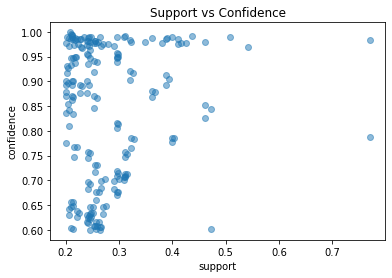

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()